## Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Preprocessing the Data](#2)
    - Missing Value check
    - Data type check
1. [Step 3: Data Visualization](#3)
    - Boxplot
    - Paichart
    - Groupby
1. [Step 4: Feature Selection](#4) 
    - RFE
    - VIF
    - Correlation
1. [Step 5: Building a Model](#5)
   - Linear
   - XGBoost


<a id="1"></a> <br>
## Step 1: Reading and Understanding the Data

In [295]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [5,5]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [296]:
# Reading the automobile consulting company file on which analysis needs to be done
df_auto = pd.read_csv('cars_price.csv')
df_auto.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0000,petrol,2000.0000,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0000,diesel,1400.0000,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0000,petrol,2500.0000,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0000,petrol,1200.0000,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0000,diesel,2200.0000,burgundy,mechanics,front-wheel drive,D


In [297]:
df_auto=df_auto.drop('Unnamed: 0',axis=1)

In [298]:
df_auto.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0000,petrol,2000.0000,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0000,diesel,1400.0000,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0000,petrol,2500.0000,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0000,petrol,1200.0000,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0000,diesel,2200.0000,burgundy,mechanics,front-wheel drive,D


In [299]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 40000 non-null  object 
 1   model                40000 non-null  object 
 2   priceUSD             40000 non-null  int64  
 3   year                 40000 non-null  int64  
 4   condition            40000 non-null  object 
 5   mileage(kilometers)  40000 non-null  float64
 6   fuel_type            40000 non-null  object 
 7   volume(cm3)          39970 non-null  float64
 8   color                40000 non-null  object 
 9   transmission         40000 non-null  object 
 10  drive_unit           38655 non-null  object 
 11  segment              36245 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


In [300]:
## As there are many catogarical features let's go through those so we can drop some which will not impact the decision
print(df_auto.make.unique())
print(df_auto.model.unique())
print(df_auto.condition.unique())
print(df_auto.fuel_type.unique())
print(df_auto.color.unique())
print(df_auto.transmission.unique())
print(df_auto.drive_unit.unique())
print(df_auto.segment.unique())

['honda' 'ford' 'nissan' 'volkswagen' 'mitsubishi' 'renault' 'audi'
 'daewoo' 'toyota' 'opel' 'chevrolet' 'mercedes-benz' 'lexus' 'bmw' 'gaz'
 'volvo' 'jaguar' 'suzuki' 'lada-vaz' 'hyundai' 'citroen' 'alfa-romeo'
 'mazda' 'land-rover' 'saab' 'kia' 'ssangyong' 'geely' 'fiat' 'peugeot'
 'rover' 'skoda' 'seat' 'changan' 'cadillac' 'subaru' 'uaz' 'moskvich'
 'lifan' 'chrysler' 'maserati' 'buick' 'infiniti' 'gmc' 'porsche' 'acura'
 'pontiac' 'jeep' 'great-wall' 'zaz' 'smart' 'datsun' 'eksklyuziv' 'mini'
 'luaz' 'roewe' 'proton' 'izh' 'dacia' 'daihatsu' 'chery' 'mg' 'hafei'
 'lancia' 'raf' 'shanghai-maple' 'lincoln' 'isuzu' 'iran-khodro' 'scion'
 'saturn' 'haval' 'ravon' 'tesla' 'plymouth' 'mercury' 'vortex' 'wartburg'
 'aro' 'tata' 'zotye' 'saipa' 'oldsmobile' 'bentley' 'faw' 'jac' 'fso'
 'dong-feng' 'bogdan' 'byd' 'aston-martin' 'tagaz' 'mclaren']
['accord' 'fusion' 'teana' 'fox' 'primera' 'x-trail' 'galant' 'golf'
 'passat' 'vel-satis' 'a6' 'matiz' 'land-cruiser' 'outlander' 'vectra'
 'za

Looking into unique values of these catagorical features we can say that 
1.make and model have so much unique values and dealing with them will result in so much bulky data so better we drop those in later stages . 
2.Remaining features have less unique values well decide if to add those or not after visualizing the data 

Here we can say that data don't have much missing values 

<a id="2"></a> <br>
## Step 2  : Preprocessing the data 

### missing data 

In [301]:
df_auto_clean = df_auto.drop(['make','model'],axis=1)

In [302]:
df_auto_clean = df_auto_clean.dropna(subset=['segment','volume(cm3)'])

In [303]:
df_auto_clean.isna().sum()

priceUSD               0   
year                   0   
condition              0   
mileage(kilometers)    0   
fuel_type              0   
volume(cm3)            0   
color                  0   
transmission           0   
drive_unit             1225
segment                0   
dtype: int64

In [304]:
df_auto.drive_unit.value_counts()

front-wheel drive             27074
rear drive                    4809 
all-wheel drive               4176 
part-time four-wheel drive    2596 
Name: drive_unit, dtype: int64

In [305]:
df_auto_clean.drive_unit= df_auto_clean.drive_unit.fillna(value='front-wheel drive')

In [306]:
df_auto_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36241 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   priceUSD             36241 non-null  int64  
 1   year                 36241 non-null  int64  
 2   condition            36241 non-null  object 
 3   mileage(kilometers)  36241 non-null  float64
 4   fuel_type            36241 non-null  object 
 5   volume(cm3)          36241 non-null  float64
 6   color                36241 non-null  object 
 7   transmission         36241 non-null  object 
 8   drive_unit           36241 non-null  object 
 9   segment              36241 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.0+ MB


### Remove Outliers

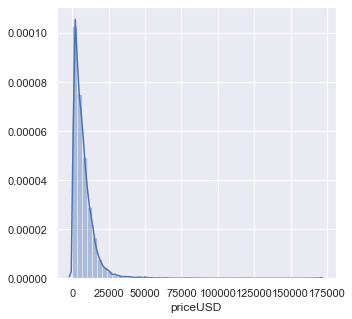

In [307]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(df_auto_clean.priceUSD)

In [308]:
# Obviously there are some outliers present 
# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers
# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = df_auto_clean.priceUSD.quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df_auto_clean[df_auto_clean.priceUSD<q]
# In this way we have essentially removed the top 1% of the data about 'Price'

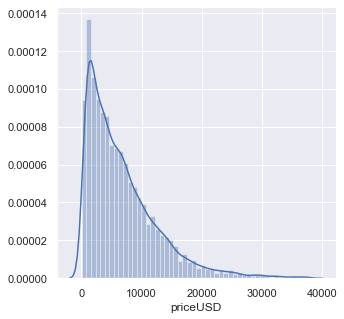

In [309]:
sns.distplot(data_1.priceUSD)

In [310]:
data_1.shape

(35878, 10)

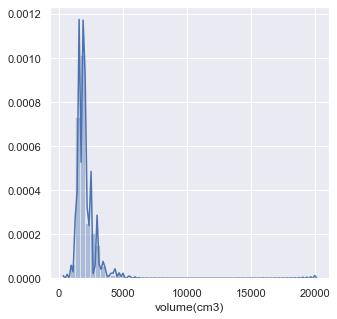

In [311]:
sns.distplot(data_1['volume(cm3)'])

In [312]:
q = data_1['volume(cm3)'].quantile(0.99)

data_1 = data_1[data_1['volume(cm3)']<q]


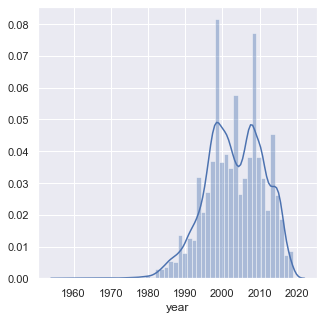

In [313]:
sns.distplot(data_1['year'])

In [314]:
data_1.shape

(35452, 10)

In [315]:
q = data_1['year'].quantile(0.01)

data_1 = data_1[data_1['year']>q]


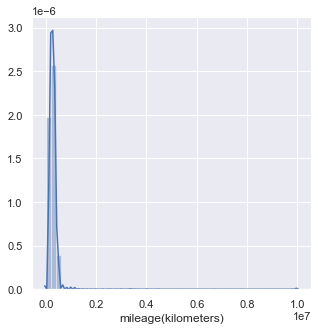

In [316]:
sns.distplot(data_1['mileage(kilometers)'])

In [317]:
q = data_1['mileage(kilometers)'].quantile(0.99)

data_1 = data_1[data_1['mileage(kilometers)']<q]


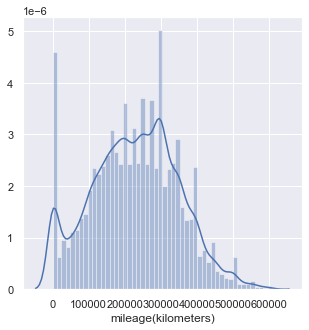

In [318]:
sns.distplot(data_1['mileage(kilometers)'])

In [319]:
data_cleaned = data_1.reset_index(drop=True)

In [320]:
data_cleaned.shape

(34680, 10)

<a id="3"></a> <br>
## Step 3: Data Visualization 

In [184]:
train_data = data_cleaned
train_data

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,5550,2008,with mileage,172000.0000,diesel,1400.0000,silver,mechanics,front-wheel drive,M
1,8300,2008,with mileage,223000.0000,petrol,2500.0000,purple,auto,front-wheel drive,D
2,3300,2005,with mileage,140000.0000,petrol,1200.0000,blue,mechanics,front-wheel drive,A
3,2450,2002,with damage,413000.0000,diesel,2200.0000,burgundy,mechanics,front-wheel drive,D
4,18900,2016,with mileage,148000.0000,diesel,1600.0000,black,mechanics,front-wheel drive,J
...,...,...,...,...,...,...,...,...,...,...
34675,9700,2008,with mileage,278000.0000,diesel,2000.0000,blue,mechanics,front-wheel drive,D
34676,12500,2008,with mileage,214000.0000,petrol,3700.0000,silver,auto,all-wheel drive,J
34677,4754,2001,with mileage,295000.0000,petrol,2200.0000,blue,mechanics,front-wheel drive,E
34678,4000,1999,with mileage,0.0000,diesel,2200.0000,other,mechanics,rear drive,D


Let's wrangle data from each row

##  Price 

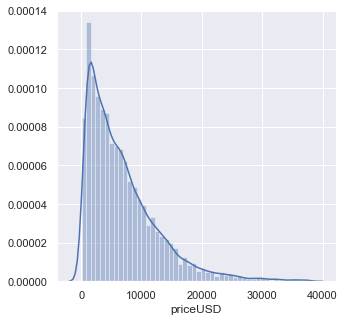

In [151]:
sns.distplot(train_data['priceUSD'])

#### Here already remove the outliers . Mostly we have data concentrated in lower price range and gradualy decreasing as price goes high

##  Year

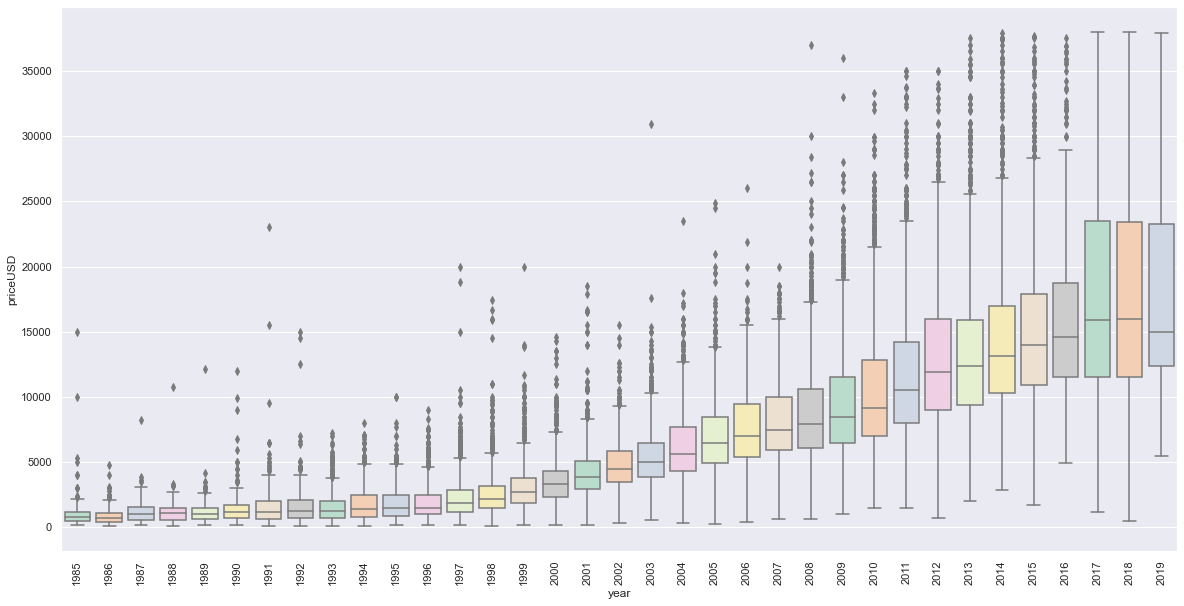

In [150]:
var = 'year'
data = pd.concat([train_data['priceUSD'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="priceUSD", data=data ,palette='Pastel2')
plt.xticks(rotation=90);

### Outcomes :
#### 1. Cars from 1985-1995 have very low pice rage .
#### 2. Car price from 1996 started growing exponentially till 2015
#### 3. From 2016 there extreme high range of prices.

## Condition 	

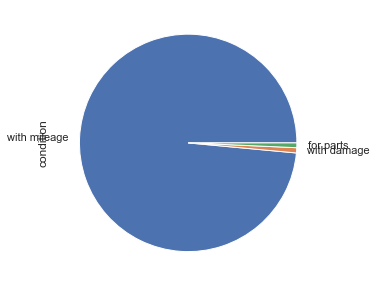

In [149]:
train_data.condition.value_counts().plot.pie()

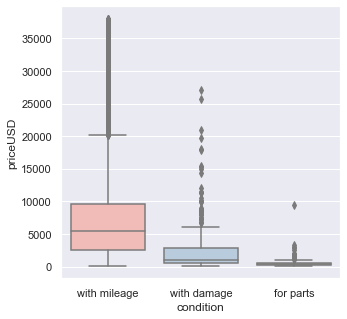

In [148]:
sns.boxplot(x = 'condition', y = 'priceUSD', data = train_data ,palette='Pastel1')

### Outcomes :
#### 1. Most of the cars with mileage and they have much more price range 
#### 2. Very less cars are with damage condition and for parts . Price range for parts is cosiderably very low .

## mileage(kilometers)

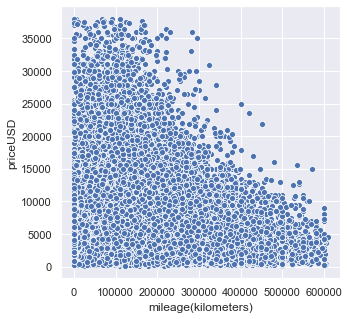

In [147]:
sns.scatterplot(x='mileage(kilometers)',y='priceUSD',data=train_data)

#### There no any realtion between price and mileage But we can say that higher mileage cars goes in lowest price  range . From 0-200000km cars might go with higher price

## Fuel type

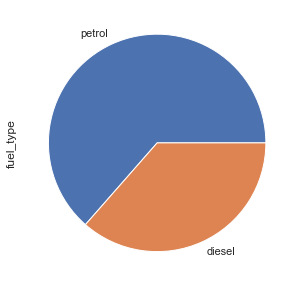

In [146]:
train_data.fuel_type.value_counts().plot.pie()

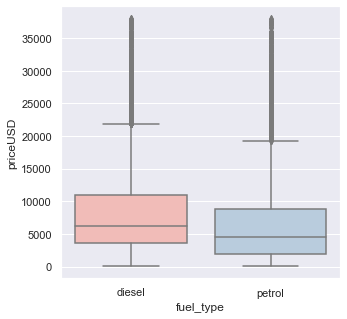

In [145]:
sns.boxplot(x = 'fuel_type', y = 'priceUSD', data = train_data ,palette='Pastel1')

#### Both petrom and diesel prices are similar so they are not impacting value that much .


## volume 

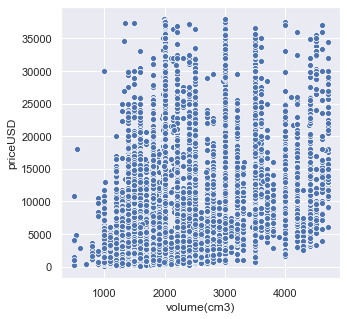

In [153]:
sns.scatterplot(x='volume(cm3)',y='priceUSD',data=train_data)

#### There is no relation between volume and price 

## color

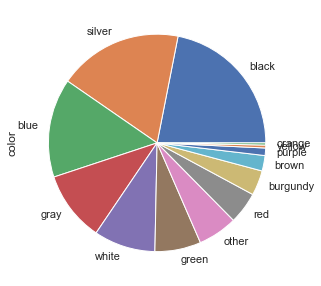

In [154]:
train_data.color.value_counts().plot.pie()

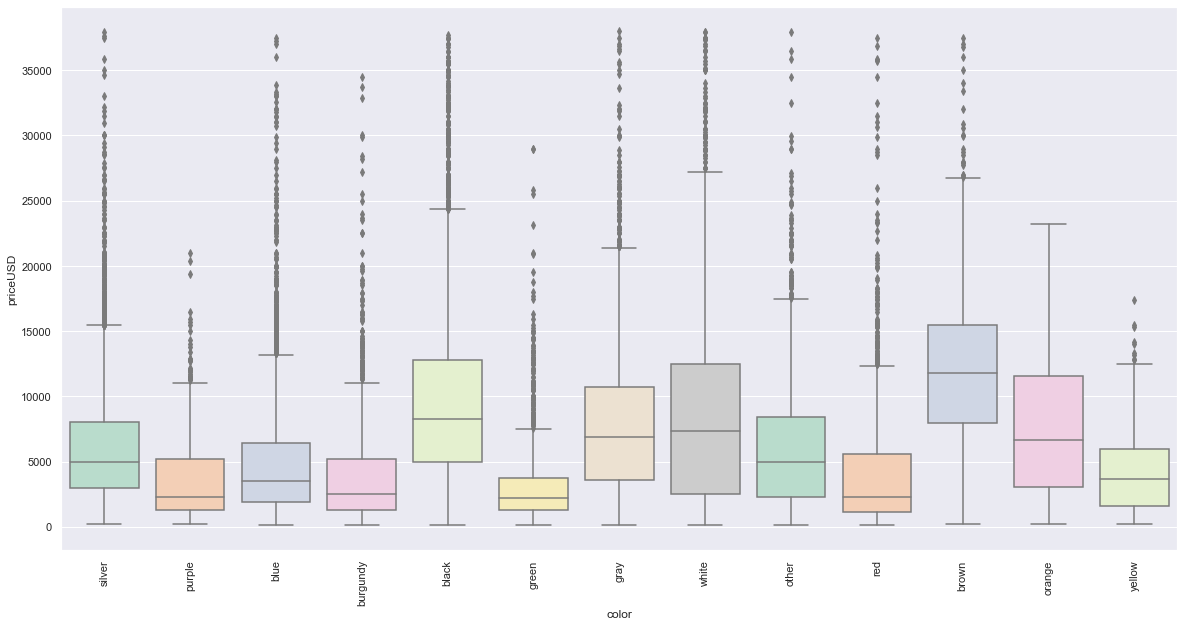

In [156]:
var = 'color'
data = pd.concat([train_data['priceUSD'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="priceUSD", data=data ,palette='Pastel2')
plt.xticks(rotation=90);

### Outcomes :
#### 1. Black,White,Brown colored cars are having higher price .
#### 2. Yellow,Red,Green,Purple are having lower price range than usual .

## transmission

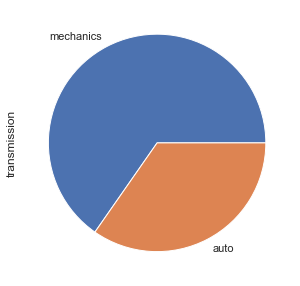

In [158]:
train_data.transmission.value_counts().plot.pie()

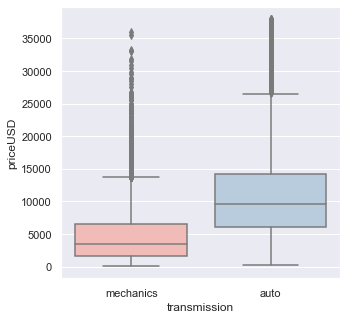

In [159]:
sns.boxplot(x = 'transmission', y = 'priceUSD', data = train_data ,palette='Pastel1')

#### auto transmission cars price in moslty cocentrated on higher price ranges and average price range for mechanical transmission cars is low

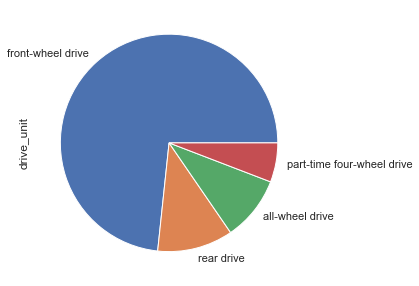

In [194]:
train_data.drive_unit.value_counts().plot.pie()

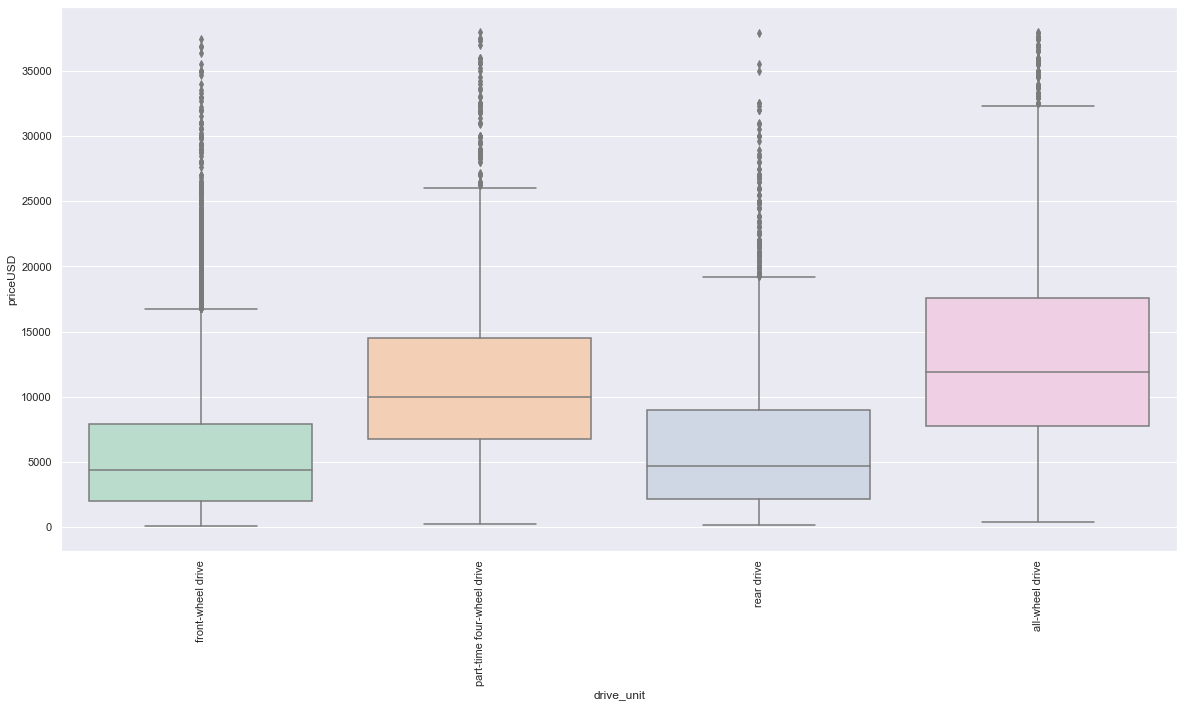

In [196]:
var = 'drive_unit'
data = pd.concat([train_data['priceUSD'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="priceUSD", data=data ,palette='Pastel2')
plt.xticks(rotation=90);

#### 1. All wheel drive cars are comparetively more expensive than other cars then comes part-time four-wheel drive cars .
#### 2. Front wheen drive cars price range varies between low to high both but average cars falls in low price range .

## segment

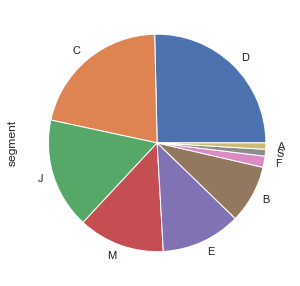

In [161]:
train_data.segment.value_counts().plot.pie()

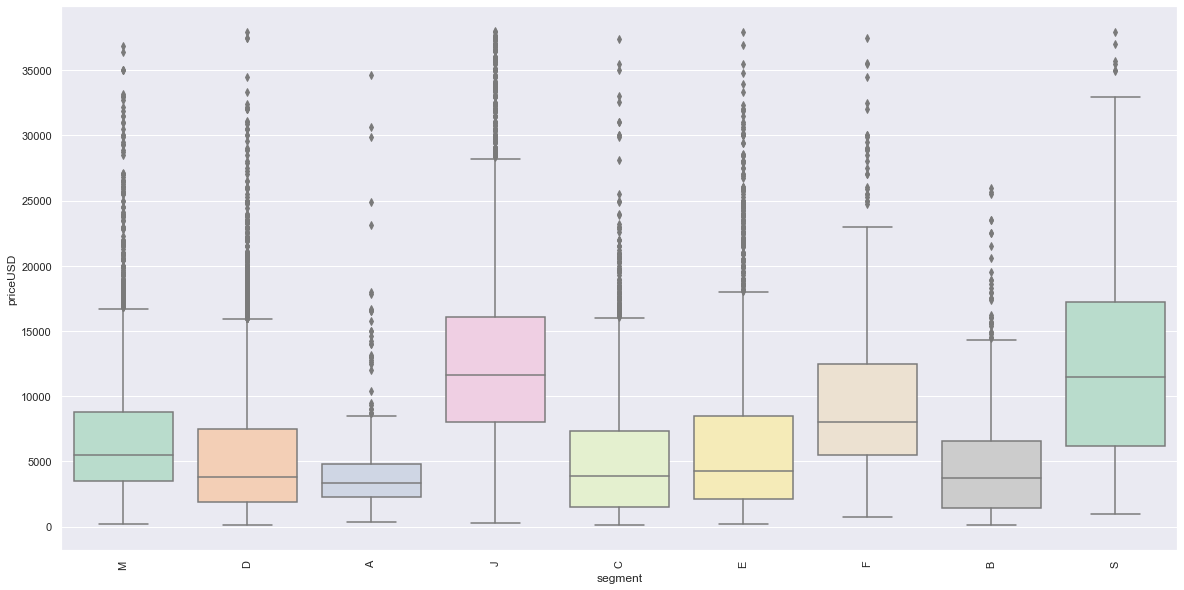

In [163]:
var = 'segment'
data = pd.concat([train_data['priceUSD'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="priceUSD", data=data ,palette='Pastel2')
plt.xticks(rotation=90);

#### Outcomes  :
#### 1. J and S class cars are most expensive also F class cars are expensive .
#### 2. A and B class cars prices are low .

## Using groupBy

In [185]:
train_data.head()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,5550,2008,with mileage,172000.0000,diesel,1400.0000,silver,mechanics,front-wheel drive,M
1,8300,2008,with mileage,223000.0000,petrol,2500.0000,purple,auto,front-wheel drive,D
2,3300,2005,with mileage,140000.0000,petrol,1200.0000,blue,mechanics,front-wheel drive,A
3,2450,2002,with damage,413000.0000,diesel,2200.0000,burgundy,mechanics,front-wheel drive,D
4,18900,2016,with mileage,148000.0000,diesel,1600.0000,black,mechanics,front-wheel drive,J


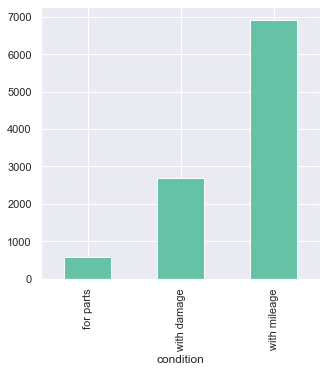

In [202]:
train_data.groupby('condition')['priceUSD'].mean().plot.bar(colormap = 'Set2')

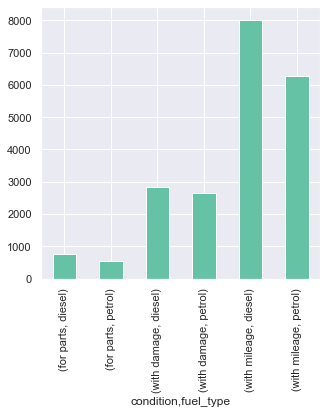

In [206]:
train_data.groupby(['condition','fuel_type'])['priceUSD'].mean().plot.bar(colormap = 'Set2')

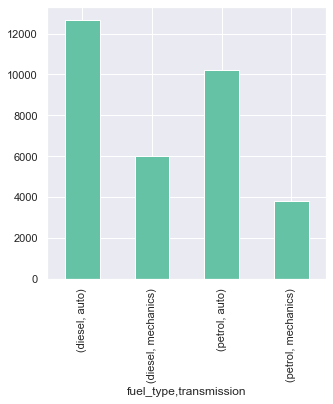

In [207]:
train_data.groupby(['fuel_type','transmission'])['priceUSD'].mean().plot.bar(colormap = 'Set2')

#### Here we can see that diesel,auto transmission cars average price in higher .

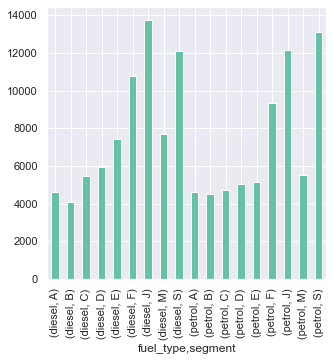

In [208]:
train_data.groupby(['fuel_type','segment'])['priceUSD'].mean().plot.bar(colormap = 'Set2')

In [192]:
train_data.groupby(['fuel_type'])['priceUSD'].mean()

fuel_type
diesel   7962.7620
petrol   6200.0293
Name: priceUSD, dtype: float64

<a id="4"></a> <br>
## Step 4 : Feature selection 

In [321]:
data_with_dummies = pd.get_dummies(train_data, drop_first=True)

In [322]:
data_with_dummies

,priceUSD,year,mileage(kilometers),volume(cm3),condition_with damage,condition_with mileage,fuel_type_petrol,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow,transmission_mechanics,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,5550,2008,172000.0000,1400.0000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0
1,8300,2008,223000.0000,2500.0000,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,3300,2005,140000.0000,1200.0000,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,2450,2002,413000.0000,2200.0000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,18900,2016,148000.0000,1600.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34675,9700,2008,278000.0000,2000.0000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
34676,12500,2008,214000.0000,3700.0000,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
34677,4754,2001,295000.0000,2200.0000,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
34678,4000,1999,0.0000,2200.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [323]:
Y = data_with_dummies['priceUSD']
X = data_with_dummies.drop('priceUSD',axis=1)

In [324]:
Y

0        5550 
1        8300 
2        3300 
3        2450 
4        18900
         ...  
34675    9700 
34676    12500
34677    4754 
34678    4000 
34679    744  
Name: priceUSD, Length: 34680, dtype: int64

In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [233]:
vif.sort_values(by='VIF')

,VIF,Features
11,1.0190,color_orange
17,1.0289,color_yellow
13,1.0600,color_purple
7,1.1178,color_brown
8,1.2011,color_burgundy
14,1.2780,color_red
12,1.2878,color_other
10,1.3860,color_green
16,1.4576,color_white
9,1.4999,color_gray


In [219]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

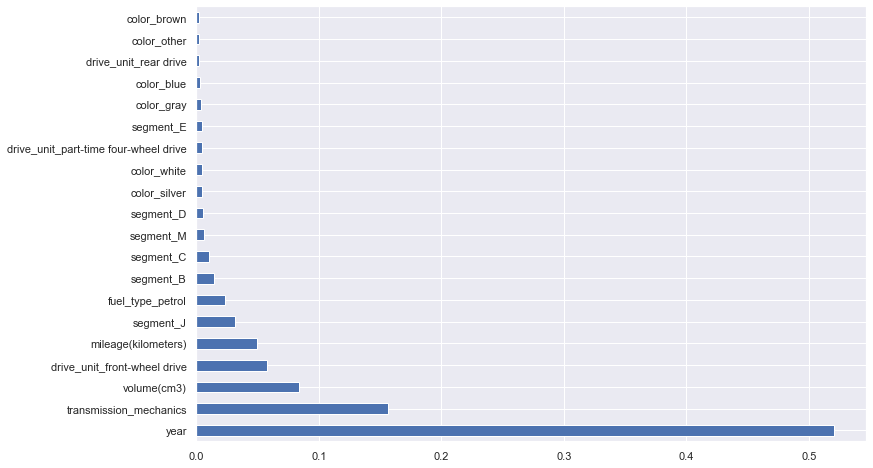

In [220]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

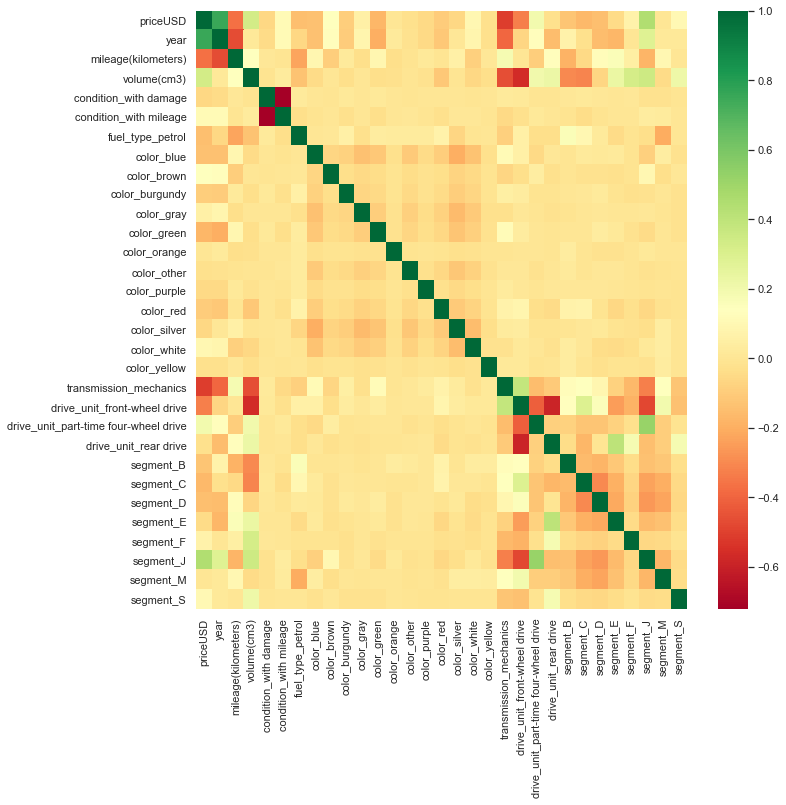

In [225]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (11, 11))
sns.heatmap(data_with_dummies.corr(), cmap="RdYlGn")
plt.show()

In [237]:
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X,Y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['year', 'mileage(kilometers)', 'volume(cm3)', 'condition_with mileage',
       'fuel_type_petrol', 'color_blue', 'color_gray', 'color_other',
       'color_silver', 'color_white', 'transmission_mechanics',
       'drive_unit_front-wheel drive', 'drive_unit_part-time four-wheel drive',
       'drive_unit_rear drive', 'segment_B', 'segment_C', 'segment_D',
       'segment_E', 'segment_J', 'segment_M'],
      dtype='object')


In [242]:
data_with_dummies.corr().sort_values(by='priceUSD')['priceUSD']

transmission_mechanics                  -0.5092
mileage(kilometers)                     -0.3707
drive_unit_front-wheel drive            -0.3294
color_green                             -0.1759
segment_C                               -0.1689
segment_D                               -0.1462
fuel_type_petrol                        -0.1441
color_blue                              -0.1403
segment_B                               -0.1239
color_red                               -0.1013
color_burgundy                          -0.0897
condition_with damage                   -0.0621
color_silver                            -0.0619
color_purple                            -0.0526
segment_E                               -0.0454
color_other                             -0.0276
color_yellow                            -0.0253
drive_unit_rear drive                   -0.0242
segment_M                               0.0026 
color_orange                            0.0048 
color_gray                              

In [325]:
X_New=X[['year', 'mileage(kilometers)', 'volume(cm3)', 'condition_with mileage',
       'fuel_type_petrol', 'color_blue', 'color_gray', 'color_other',
       'color_silver', 'color_white', 'transmission_mechanics',
       'drive_unit_front-wheel drive', 'drive_unit_part-time four-wheel drive',
       'drive_unit_rear drive', 'segment_B', 'segment_C', 'segment_D',
       'segment_E', 'segment_J', 'segment_M']]

In [326]:
X_New.shape

(34680, 20)

In [245]:
variables = X_New
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [247]:
vif.sort_values(by='VIF')

,VIF,Features
7,1.1448,color_other
9,1.2407,color_white
6,1.2601,color_gray
5,1.3884,color_blue
8,1.4684,color_silver
12,1.7043,drive_unit_part-time four-wheel drive
4,3.1275,fuel_type_petrol
13,3.2254,drive_unit_rear drive
10,4.2335,transmission_mechanics
14,4.3726,segment_B


In [271]:
X_new=X_New.drop(['year','condition_with mileage','volume(cm3)','drive_unit_front-wheel drive','segment_M'],axis=1)

In [272]:
variables = X_new
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.0012,mileage(kilometers)
1,2.6116,fuel_type_petrol
2,1.3511,color_blue
3,1.2027,color_gray
4,1.1240,color_other
5,1.3909,color_silver
6,1.1697,color_white
7,3.1559,transmission_mechanics
8,1.4548,drive_unit_part-time four-wheel drive
9,1.3856,drive_unit_rear drive


In [282]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_New)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [284]:
inputs_scaled = scaler.transform(X_New)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, Y, test_size = 0.2, random_state = 25)

<a id="5"></a> <br>
## Step 5 : Model building and evaluation

In [279]:
import statsmodels.api as sm

In [286]:
x=sm.add_constant(X_train)
results=sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priceUSD   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     3737.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:29:15   Log-Likelihood:            -2.6209e+05
No. Observations:               27744   AIC:                         5.242e+05
Df Residuals:                   27723   BIC:                         5.244e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6841.5879     18.410    371.617      0.000    6805.503    6877.673
x1          3744.7334     24.051    155.702      0.000    3697.593    3791.874
x2          -574.2941     22.363    -25.681      0.000    -618.126    -530.462
x3           822.4687     27.539     29.866      0.000     768.492     876.446
x4            87.9187     18.487      4.756      0.000      51.683     124.155
x5          -539.9665     20.135    -26.817      0.000    -579.432    -500.500
x6          -144.2515     20.130     -7.166      0.000    -183.708    -104.795
x7           -95.5133     19.636     -4.864      0.000    -134.001     -57.026
x8          -102.1284     19.103     -5.346      0.000    -139.571     -64.686
x9          -379.9450     20.127    -18.877      0.000    -419.396    -340.494
x10          171.3241     19.551      8.763      0.000     133.003     209.645
x11         -505.4034     24.040    -21.024      0.000    -552.522    -458.285
x12         -980.0589     38.942    -25.167      0.000   -1056.387    -903.730
x13         -430.3128     23.275    -18.488      0.000    -475.934    -384.692
x14         -395.5558     31.262    -12.653      0.000    -456.830    -334.282
x15         -548.0650     37.124    -14.763      0.000    -620.830    -475.300
x16         -286.2699     49.139     -5.826      0.000    -382.585    -189.955
x17           26.2970     49.586      0.530      0.596     -70.893     123.487
x18          109.3828     36.965      2.959      0.003      36.930     181.835
x19          553.6638     45.184     12.254      0.000     465.101     642.226
x20          143.4516     40.668      3.527      0.000      63.741     223.162
==============================================================================
Omnibus:                    11112.816   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77661.588
Skew:                           1.771   Prob(JB):                         0.00
Kurtosis:                      10.392   Cond. No.                         9.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7294258100541603
Accuracy on Testing set:  0.746584652947054


In [291]:
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor

In [293]:

xgb1 = XGBRegressor()
parameters = {'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,parameters,cv = 2)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
yp=xgb_grid.predict(X_test)
print(r2_score(y_test,yp))
print(mean_squared_error(y_test,yp))


[19:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8939274919863746
{'n_estimators': 500}
0.90456337901595
3296585.318334413


Text(0.5, 1.0, 'Residuals PDF')

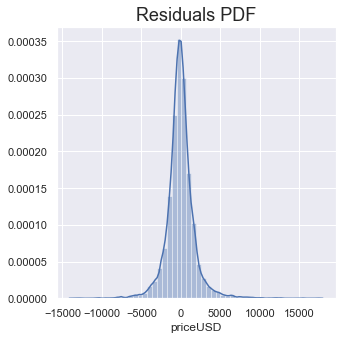

In [294]:
sns.distplot(y_test - yp)

plt.title("Residuals PDF", size=18)

## Model Evaluation : 
#### 1. Here we have tested two models linear and XGboost regressor . In Linear regression we have not get good accuracy but we collected some useful insights regarding data from p values we have removed the features having high p-value .
#### 2. n XGboost regressor we got train score  89 and test score 90 . 
#### 3. Residual PDF in having central tendency is not skewed in any direction Its some what concetrated to zero with +5000 or -5000 residuals

## Testing some models with Pycaret library

In [329]:
dt=data_with_dummies[['year', 'mileage(kilometers)', 'volume(cm3)', 'condition_with mileage',
       'fuel_type_petrol', 'color_blue', 'color_gray', 'color_other',
       'color_silver', 'color_white', 'transmission_mechanics',
       'drive_unit_front-wheel drive', 'drive_unit_part-time four-wheel drive',
       'drive_unit_rear drive', 'segment_B', 'segment_C', 'segment_D',
       'segment_E', 'segment_J', 'segment_M','priceUSD']]

In [330]:
data = dt.sample(frac=0.92, random_state=786).reset_index(drop=True)
data_unseen = dt.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (31906, 21)
Unseen Data For Predictions: (2774, 21)


In [331]:
from pycaret.regression import *

In [335]:
exp_reg101 = setup(data = data, target = 'priceUSD', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(31906, 21)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [336]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1176.653800,3323140.140700,1822.128800,0.904200,0.363200,0.298400
1,Light Gradient Boosting Machine,1178.238700,3334817.390100,1825.389500,0.903900,0.360600,0.299700
2,Random Forest,1221.491400,3755498.565400,1936.867200,0.891800,0.365200,0.301600
3,Extreme Gradient Boosting,1287.448500,3947008.411800,1985.654900,0.886200,0.381400,0.326000
4,Gradient Boosting Regressor,1290.173100,3972362.466800,1992.119400,0.885400,0.384400,0.326700
5,Extra Trees Regressor,1306.055200,4346924.543800,2082.829800,0.874800,0.388900,0.315200
6,Decision Tree,1585.168100,6495709.743600,2547.410700,0.812700,0.469800,0.371800
7,Lasso Regression,2106.545500,9289817.534400,3047.081400,0.732400,0.707900,0.745200
8,Linear Regression,2106.989500,9290796.955400,3047.238200,0.732300,0.706800,0.746200
9,Ridge Regression,2106.967800,9290742.398900,3047.229400,0.732300,0.707000,0.746200


In [337]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1164.1261,3315244.2187,1820.7812,0.9042,0.3432,0.2805
1,1142.1146,2994036.7434,1730.3285,0.9116,0.3652,0.3018
2,1131.5431,3039653.8973,1743.4603,0.9074,0.3624,0.2922
3,1195.8751,3373438.6528,1836.6923,0.9025,0.3626,0.2997
4,1185.9427,3404333.0656,1845.0835,0.9021,0.3493,0.2974
5,1220.4581,3576566.2021,1891.1812,0.9069,0.3630,0.3037
6,1181.3804,3280349.5646,1811.1735,0.9038,0.3565,0.2961
7,1184.2088,3425109.6329,1850.7052,0.9079,0.3772,0.3200
8,1178.0115,3313212.4578,1820.2232,0.9024,0.3714,0.3125
9,1198.7264,3626229.4660,1904.2661,0.8898,0.3556,0.2937


In [338]:
tuned_ada = tune_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1151.7123,3284655.3781,1812.3618,0.9051,0.3660,0.2752
1,1132.4691,3019016.1963,1737.5316,0.9109,0.3712,0.2895
2,1137.1834,3166922.2761,1779.5849,0.9035,0.3587,0.2854
3,1198.7586,3410452.8630,1846.7411,0.9014,0.3531,0.2917
4,1178.3457,3406648.8264,1845.7109,0.9020,0.3457,0.2906
5,1221.7091,3626606.9028,1904.3652,0.9056,0.3562,0.2940
6,1171.5500,3315655.9368,1820.8943,0.9027,0.3504,0.2867
7,1172.0215,3389149.1365,1840.9642,0.9089,0.3676,0.3066
8,1176.5542,3389893.7959,1841.1664,0.9001,0.3688,0.3099
9,1199.8952,3674847.8523,1916.9893,0.8883,0.3482,0.2875


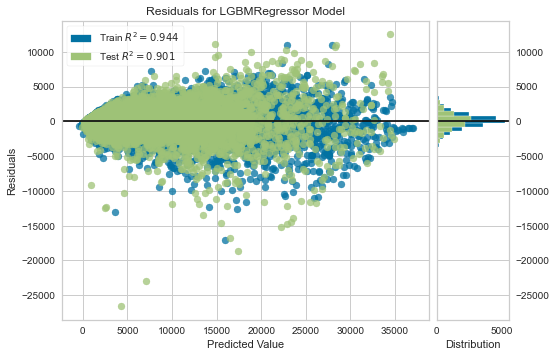

In [339]:
plot_model(tuned_ada)

### Here using CatBoost Regressor we got almost same R2 as previously created Random Forest Regressor Model